<a href="https://colab.research.google.com/github/marvinxu-free/Algorithm/blob/master/ensorflow2_chapter3_%E5%9F%BA%E6%9C%AC%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 基本神经网络模型

## encoder与decoder

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.dtype

dtype('uint8')

In [4]:
x_train = x_train.astype('float32') / 255. # normalise
x_test = x_test.astype('float32') / 255.

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train = x_train.reshape(( x_train.shape[0], np.prod(x_train.shape[1:]))) #flatten
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
image_dim = 784 #输入的图像元素个数
encoding_dim = 32 # 编码压缩后元素的个数

In [8]:
input_image = Input(shape=(image_dim,))
encode_image = Dense(encoding_dim, activation='relu', 
           activity_regularizer=regularizers.l1(10e-5))(input_image)

encoder = Model(input_image, encode_image)

decoded_image = Dense(image_dim, activation='sigmoid')(encode_image)

autoencoder = Model(input_image, decoded_image)

In [9]:
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [13]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

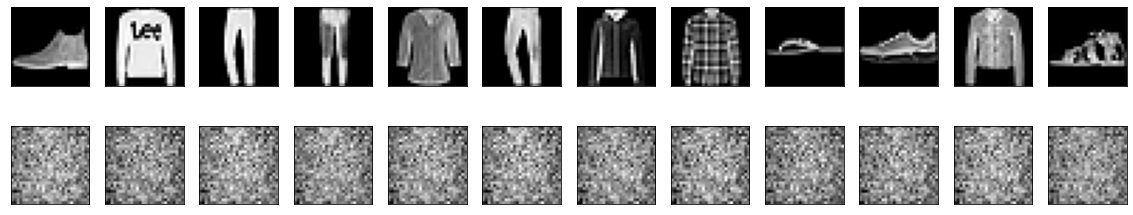

In [14]:
number_of_items = 12  # how many tems we will display
plt.figure(figsize=(20, 4))
for i in range(number_of_items):
    # display items before compression
    graph = plt.subplot(2, number_of_items, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)

    # display items after decompression
    graph = plt.subplot(2, number_of_items, i + 1 + number_of_items)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)
plt.show()

## 二分类问题: 电影评论分类

### IMDB数据集
本部分使用IMDB数据集，它来自互联网电影数据集的50000条严重两极分化的评论。
数据集已经被分为为25000条训练数据，25000条测试数据，防止数据泄露。
数据已经被预处理为整数序列的形式，每一个整数代表评论里面一个Word在词典中的某个单词。

#### 数据预处理
训练数据张量化

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

In [4]:
def conv_vec(seqs, dimension=1000):
  """
  将x_train转化为张量， 默认里面有list类型数据
  """

  result = np.zeros((len(seqs), dimension))

  for i, seq in enumerate(seqs):
    result[i, seq] = 1

  return result


In [8]:
x_train =conv_vec(x_train)
x_test =conv_vec(x_test)

In [9]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

### 构建网络


In [10]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [13]:
inputs = Input(shape=(1000,))
d1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
d2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d1)
out = Dense(1, activation='sigmoid')(d2)

model = Model(inputs, out)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 132,289
Trainable params: 132,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3050 - acc: 0.8973
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3049 - acc: 0.8981
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3035 - acc: 0.8987
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3018 - acc: 0.8987
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3041 - acc: 0.8956
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3037 - acc: 0.8974
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3036 - acc: 0.8973
Epoch 8/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3038 - acc: 0.8990
Epoch 9/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3028 - acc: 0.8980
Epoch 10/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3043 - acc: 0.8964
Epoch 11/50
1250/1250 [======